# **Assignment 10**

In [51]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [52]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()



**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [53]:
# Create a DataFrame with the first 5 rows of the Iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

# Display the DataFrame
print("DataFrame with the first 5 rows:")
print(df)

# Create a Python list containing target names
target_names = list(iris.target_names)

# Display the list of target names
print("\nList of target names:")
print(target_names)


DataFrame with the first 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

List of target names:
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [54]:

# Create a kNN classifier with neighbors=5
knn_classifier = KNN(n_neighbors=5)

# Fit the model on the entire dataset
knn_classifier.fit(iris.data, iris.target)

# Define new observations for prediction
new_observations = np.array([[5.1, 3.5, 1.4, 0.2],   # Example observation 1
                             [6.2, 3.4, 5.4, 2.3],   # Example observation 2
                             [7.0, 3.2, 4.7, 1.4]])  # Example observation 3

# Predict the categories of new observations
predictions_encoded = knn_classifier.predict(new_observations)

# Convert encoded predictions to target names
predicted_target_names = [iris.target_names[prediction] for prediction in predictions_encoded]

# Display the predicted target names
print("Predicted Target Names:")
print(predicted_target_names)


Predicted Target Names:
['setosa', 'virginica', 'versicolor']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

Maximum Correct:  30 at K = 1
Accuracy for the optimal K: 1.0


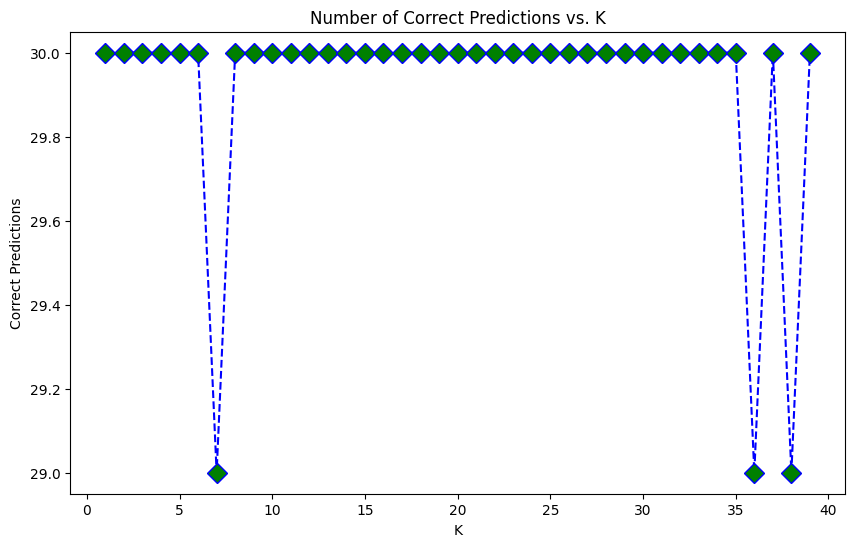

In [58]:
# Load the Iris dataset
iris = ds.load_iris()
X = iris.data
y = iris.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Loop over different values of k
correct = []
for i in range(1, 40):
    knn = KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    correct.append(np.sum(pred_i == y_test))

# Find and print the maximum correct predictions and corresponding k value
max_correct = max(correct)
max_k = correct.index(max_correct) + 1  # Adding 1 because indexing starts from 1 in the loop
print("Maximum Correct: ", max_correct, "at K =", max_k)

# Calculate and print the accuracy for the optimal k
optimal_knn = KNN(n_neighbors=max_k)
optimal_knn.fit(X_train, y_train)
optimal_predictions = optimal_knn.predict(X_test)
accuracy = np.sum(optimal_predictions == y_test) / len(y_test)
print("Accuracy for the optimal K:", accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), correct, color='blue', linestyle='dashed', marker='D', markerfacecolor='green', markersize=10)
plt.title('Number of Correct Predictions vs. K')
plt.xlabel('K')
plt.ylabel('Correct Predictions')

# Show the plot
plt.show()


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

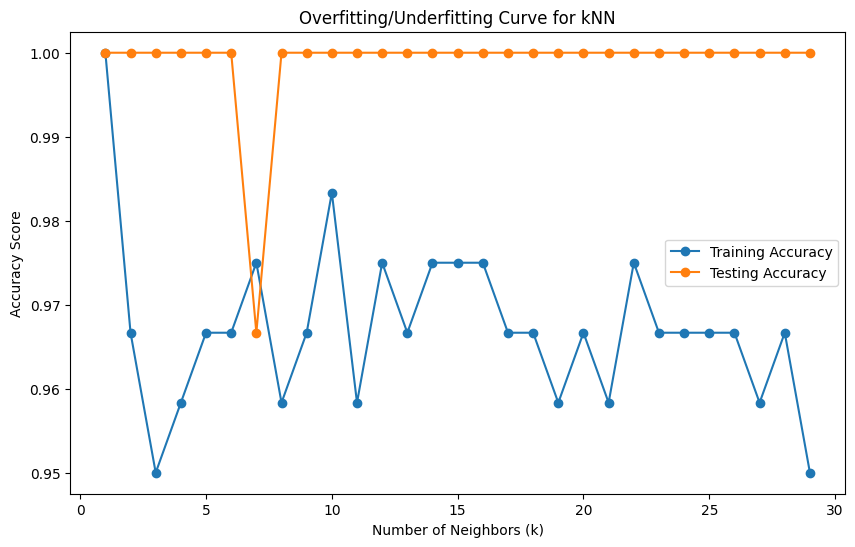

In [59]:
# Load the Iris dataset
iris = ds.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Define a range of neighbor values
neighbors_range = range(1, 30)

# Initialize empty lists to store training and testing accuracy scores
train_scores = []
test_scores = []

# Loop over different values of k
for k in neighbors_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Training accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)

    # Testing accuracy
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(neighbors_range, test_scores, label='Testing Accuracy', marker='o')

plt.title('Overfitting/Underfitting Curve for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
